# Example Model Inversion Attack

This notebook demonstrates a Model Inversion Attack on a pre-trained Convolutional Neural Network (CNN) for the CIFAR-10 dataset using Keras and the ART library. This example includes initializing with an average image, similar to the approach in other ART sample notebooks.

## Import Libraries and Initialize Random Seed

We will start by importing the necessary libraries and setting a random seed for reproducibility.

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import art
tf.compat.v1.disable_eager_execution()
print(tf.__version__)
print(art.__version__)
# Set random seed for reproducibility
np.random.seed(123)

2.15.0
1.13.1


## Load Pre-trained CIFAR-10 Model and Create ART Classifier

Next, we load our pre-trained CIFAR-10 model and create an ART classifier to use.

In [23]:
from keras.models import load_model
from art.estimators.classification import KerasClassifier

# Load the pretrained CIFAR-10 model
model = load_model('../models/simple-cifar10.h5')

# Wrap the model with ART's KerasClassifier
classifier = KerasClassifier(model=model)

2024-06-16 18:41:16.697932: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_1_3/kernel/Assign' id:6737 op device:{requested: '', assigned: ''} def:{{{node dense_1_3/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1_3/kernel, dense_1_3/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


## Calculate and Display Average Image

We use the numeric representation of images to calculate an average image. This is not a real image but an average of its RGB pixel representation. This will be useful for our model inversion attack.

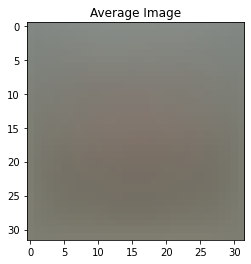

In [24]:
from keras.datasets import cifar10
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Compute the average image from the training set
average_image = np.mean(x_train, axis=0)

# Display the average image
plt.imshow(average_image.astype(np.uint8))
plt.title("Average Image")
plt.show()

## Perform Model Inversion Attack

We can now stage the attack using the `model_inversion` class. The class will use our `KerasClassifier` wrapper and a subset of the images to evaluate using the average image as a starting point.

In [25]:
from art.attacks.inference import model_inversion 

# Initialize the Model Inversion Attack with the average image
## mia = model_inversion.MIFace(classifier, max_iter=100000, batch_size=1, verbose=True)
# Select a subset of data for the attack
x_subset = x_test[:10]
y_subset = y_test[:10]

# Perform the attack on the selected subset using the average image as the starting point
x_inverted = mia.infer(x_subset, y_subset, starting_point=average_image)

Model inversion: 100%|██████████████████████████| 10/10 [00:13<00:00,  1.35s/it]


## Evaluate and Visualize Results

Once the attack has completed, we can evaluate the accuracy of the generated images with the original model and visualize the inverted images.

2024-06-16 18:41:33.366258: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_1_3/Softmax' id:6748 op device:{requested: '', assigned: ''} def:{{{node dense_1_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy of model on inverted images: 0.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


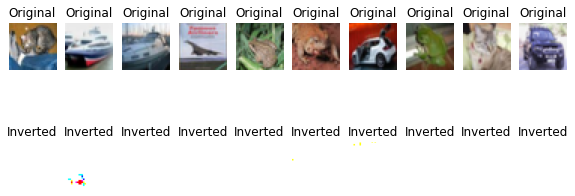

In [26]:
# Evaluate the accuracy of the inverted images
predictions = classifier.predict(x_inverted)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_subset, axis=1))
print(f"Accuracy of model on inverted images: {accuracy * 100:.2f}%")

# Visualize some of the original and inverted images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_subset[i])
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(x_inverted[i])
    plt.title("Inverted")
    plt.axis('off')
plt.show()

## Experiment with Different Initializations

We will experiment with a number of different initializations to see how they impact the model inversion attack. For each initialization, we will evaluate the attack and print the accuracy and maximum class gradient.

In [30]:
# Different initializations
x_init_white = np.zeros((10, 32, 32, 3))
x_init_grey = np.zeros((10, 32, 32, 3)) + 0.5
x_init_black = np.ones((10, 32, 32, 3))
x_init_random = np.random.uniform(0, 1, (10, 32, 32, 3))
x_init_average = np.zeros((10, 32, 32, 3)) + np.mean(x_train, axis=0)
initializations = {
    'White': x_init_white,
    'Grey': x_init_grey,
    'Black': x_init_black,
    'Random': x_init_random,
    'Average': x_init_average
}
y_subset_one_hot = np.eye(10)[y_subset.flatten()]

### Evaluate Attack with Different Initializations

We will evaluate the attack using each initialization method and print the accuracy and maximum class gradient.

Model inversion: 100%|██████████████████████████| 10/10 [00:15<00:00,  1.58s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy of model on inverted images with White initialization: 10.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


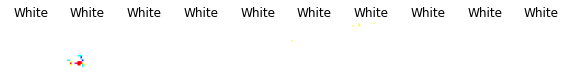

Model inversion: 100%|██████████████████████████| 10/10 [00:15<00:00,  1.52s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range 

Accuracy of model on inverted images with Grey initialization: 10.00%


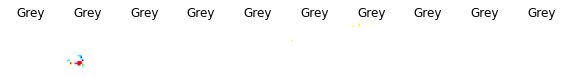

Model inversion: 100%|██████████████████████████| 10/10 [00:13<00:00,  1.31s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy of model on inverted images with Black initialization: 10.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


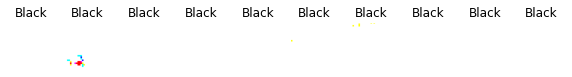

Model inversion: 100%|██████████████████████████| 10/10 [00:16<00:00,  1.60s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range 

Accuracy of model on inverted images with Random initialization: 10.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


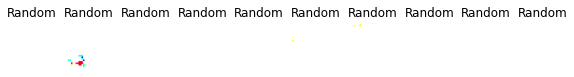

Model inversion: 100%|██████████████████████████| 10/10 [00:13<00:00,  1.36s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy of model on inverted images with Average initialization: 10.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


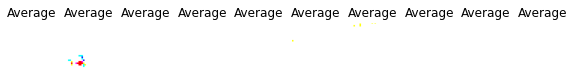

In [33]:
for init_name, x_init in initializations.items():
    # Perform the attack using the current initialization
    x_inverted = mia.infer(x_subset, y_subset, starting_point=x_init)

    # Evaluate the accuracy of the inverted images
    predictions = classifier.predict(x_inverted)
    accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_subset_one_hot, axis=1))
    print(f"Accuracy of model on inverted images with {init_name} initialization: {accuracy * 100:.2f}%")

    # Compute and print the maximum class gradient
    #max_class_gradient = np.max(np.abs(classifier.class_gradient(x_init, y_subset)))
    # print(f"Maximum class gradient for {init_name} initialization: {max_class_gradient}")

    # Visualize some of the inverted images
    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(x_inverted[i])
        plt.title(init_name)
        plt.axis('off')
    plt.show()
